<a href="https://colab.research.google.com/github/saumyasahai/Python_Data_Analytics_Course/blob/main/3_Skills_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

#### Original Exploration
[12_Exercise_Trending_Skills.ipynb](../2_Advanced/12_Exercise_Trending_Skills.ipynb)

## Import Libraries and Data

In [ ]:
import pandas as pd
import seaborn as sns
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_analyst = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_analyst_explode = df_analyst.explode('job_skills')
df_analyst_explode['job_month'] = df_analyst_explode['job_posted_date'].dt.month
#df_analyst_explode = df_analyst_explode.groupby(['job_month', 'job_skills']).count().reset_index()


(55720, 18)

In [ ]:
df_analyst_explode_pivot = df_analyst_explode.pivot_table(index = 'job_month', columns = 'job_skills',  aggfunc='size', fill_value = 0)
df_analyst_explode_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_month,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [ ]:
# add totals row (column-wise sum)
df_analyst_explode_pivot.loc['Total'] = df_analyst_explode_pivot.sum()

# sort columns by total
df_analyst_explode_pivot = df_analyst_explode_pivot[
    df_analyst_explode_pivot.loc['Total'].sort_values(ascending=False).index]

# remove totals row
df_analyst_explode_pivot = df_analyst_explode_pivot.drop('Total')


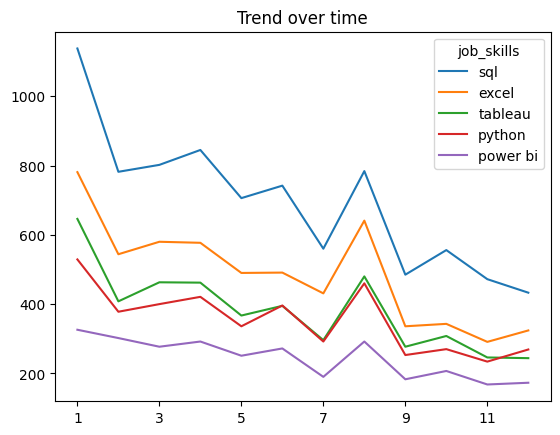

In [ ]:
df_analyst_explode_pivot.iloc[:,:5].plot(kind = 'line')
plt.xlabel('')
plt.ylabel('')
plt.title('Trend over time')
plt.show()

In [ ]:
df_analyst['job_month'] = df_analyst['job_posted_date'].dt.month
DA_totals = df_analyst.groupby('job_month').size()

DA_totals

/tmp/ipython-input-2373722088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyst['job_month'] = df_analyst['job_posted_date'].dt.month


,0
job_month,
1,1816
2,1284
3,1362
4,1369
5,1156
6,1207
7,955
8,1414
9,856


In [ ]:
df_analyst_percent = df_analyst_explode_pivot.iloc[:12].div(DA_totals/100, axis = 0)
df_analyst_percent = df_analyst_percent.reset_index()
df_analyst_percent['job_month'] = df_analyst_percent['job_month'].apply(lambda x:pd.to_datetime(x, format = '%m').strftime('%b'))
df_analyst_percent = df_analyst_percent.set_index('job_month')
#df_analyst_percent = df_analyst_percent.drop(columns = 'job_skills')
df_analyst_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


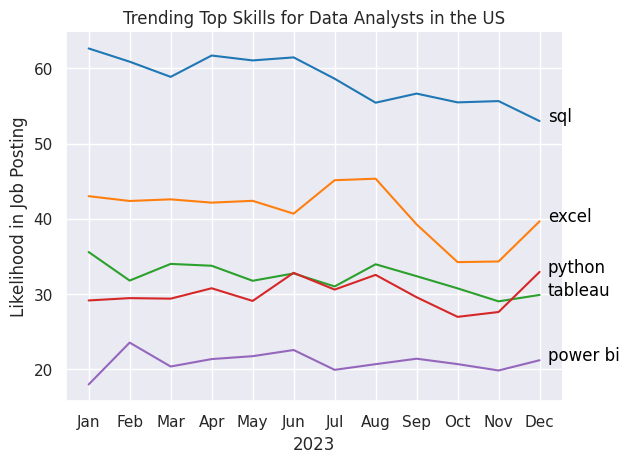

In [ ]:
from matplotlib.ticker import PercentFormatter
df_plot = df_analyst_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme()
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
#plt.gca().yaxis().set_major_formatter(PercentFormatter(decimals = 0))

for i in range(5):
  plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color = 'black')

plt.show()